0 E&R 0 Manager -0.26666666666666666
1 E&R 0 Teammates 0.7333333333333334
0 PM 1 Manager 0
1 PM 1 Teammates 1
0 CO 2 Manager 0.26666666666666666
1 CO 2 Teammates 1.2666666666666666
0 New 0 Manager -0.19999999999999998
1 New 0 Teammates 0.8
0 Existing 1 Manager 0.19999999999999998
1 Existing 1 Teammates 1.2
0 Private 0 Manager -0.19999999999999998
1 Private 0 Teammates 0.8
0 Neighborhood 1 Manager 0.19999999999999998
1 Neighborhood 1 Teammates 1.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


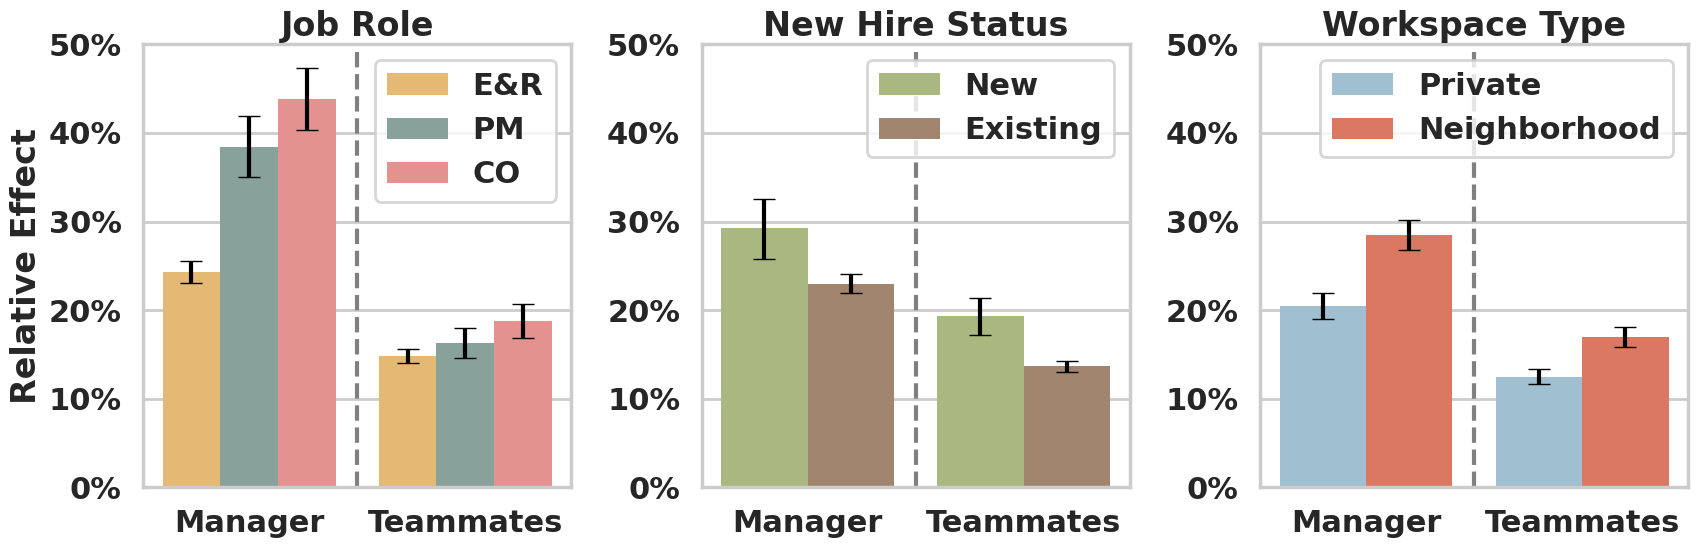

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import matplotlib.ticker as mtick

data = """location	role	period	baseline	baseline_se	variable	pp_effect	se	ci_lower	ci_upper	relative_effect	ci_lower_relative	ci_upper_relative
US	E&R	post	0.2831	0.0018	Manager	0.0688	0.0014	0.066056	0.071404	0.2430236665	0.2304589921	0.25540469
US	E&R	post	0.2831	0.0018	Teammates	0.04202172	0.00089352	0.0402704208	0.0436836672	0.1484341929	0.1404971629	0.1562519394
US	PM	post	0.2322	0.0032	Manager	0.0892	0.0029	0.083516	0.094594	0.3841515935	0.3502130229	0.4186909104
US	PM	post	0.2322	0.0032	Teammates	0.0378416	0.0015532	0.034797328	0.040730552	0.1629698536	0.1459178772	0.1802811161
US	CO	post	0.2355	0.0031	Manager	0.1031	0.0029	0.097416	0.108494	0.4377919321	0.4032519787	0.4728973429
US	CO	post	0.2355	0.0031	Teammates	0.04426936	0.0017544	0.040830736	0.047532544	0.1879802972	0.1690181806	0.2071820908"""

data_io = StringIO(data)


df = pd.read_csv(data_io, sep='\t')


my_palette = sns.color_palette(["#f6bd60", "#84a59d", "#f28482"])#, "#9b59b6", "#f39c12", "#34495e"])

# Filter dataframe for only "post" entries
post_df = df#df[df['period'] == 'post'].copy() # Copy to avoid changing original df

# Convert relative effect to percentage
post_df['relative_effect'] *= 100
post_df['ci_lower_relative'] *= 100
post_df['ci_upper_relative'] *= 100

# Create two subplots, one for absolute effect size and one for relative effect size
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17.5, 6))
sns.set(context='poster', style="whitegrid", font_scale=1, rc={"font.weight": "bold", "axes.labelweight": "bold"})
sns.set_context('poster')

# Define the offsets
offset = [-.8/3, 0,
          .8/3]

# Plot relative effect size
sns.barplot(data=post_df, x='variable', y='relative_effect', hue='role', ax=axs[0], palette=my_palette, linewidth=0)#, dodge=True, size=8)
# Add the error bars manually
for i, location in enumerate(post_df['role'].unique()):
    for j, var in enumerate(post_df['variable'].unique()):
        vals = post_df[(post_df['variable'] == var) & (post_df['role'] == location)]
        axs[0].errorbar(j+offset[i], vals['relative_effect'], yerr=[vals['relative_effect'] - vals['ci_lower_relative'], vals['ci_upper_relative'] - vals['relative_effect']], fmt='none', c='black', capsize=8)
        print(j, location, i, var, j+offset[i])

# Add separation line
axs[0].axvline(0.5, color='gray', linestyle='--')
axs[0].set_title('Job Role', weight='bold')
axs[0].legend()
axs[0].set_ylim((0, 50))
axs[0].set_ylabel('Relative Effect', weight='bold')
axs[0].set_xlabel('')
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter()) # Add percentage symbol to y-ticks

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

data = """location	role	period	baseline	baseline_se	variable	pp_effect	se	ci_lower	ci_upper	relative_effect	ci_lower_relative	ci_upper_relative
US	New	post	0.2649	0.001	Manager	0.0775	0.0044	0.068876	0.085684	0.2925632314	0.258097879	0.3258690195
US	New	post	0.2649	0.001	Teammates	0.05116716	0.00270684	0.0458617536	0.0562018824	0.1931565119	0.1718569797	0.2137441333
US	Existing	post	0.2888	0.0005	Manager	0.0664	0.0015	0.06346	0.06919	0.2299168975	0.2189937194	0.2403933014
US	Existing	post	0.2888	0.0005	Teammates	0.03944628	0.0009198	0.037643472	0.041157108	0.1365868421	0.1299036234	0.1429959975"""
my_palette = sns.color_palette(["#adc178", "#a98467"])
#, "#9b59b6", "#f39c12", "#34495e"])


data_io = StringIO(data)

df = pd.read_csv(data_io, sep='\t')
post_df = df

# Convert relative effect to percentage
post_df['relative_effect'] *= 100
post_df['ci_lower_relative'] *= 100
post_df['ci_upper_relative'] *= 100


offset = [-.6/3,
          .6/3]

# Plot relative effect size
sns.barplot(data=post_df, x='variable', y='relative_effect', hue='role', ax=axs[1], palette=my_palette, linewidth=0)#, dodge=True, size=8)
# Add the error bars manually
for i, location in enumerate(post_df['role'].unique()):
    for j, var in enumerate(post_df['variable'].unique()):
        vals = post_df[(post_df['variable'] == var) & (post_df['role'] == location)]
        axs[1].errorbar(j+offset[i], vals['relative_effect'], yerr=[vals['relative_effect'] - vals['ci_lower_relative'], vals['ci_upper_relative'] - vals['relative_effect']], fmt='none', c='black', capsize=8)
        print(j, location, i, var, j+offset[i])

# Add separation line
axs[1].axvline(0.5, color='gray', linestyle='--')
axs[1].set_title('New Hire Status', weight='bold')
axs[1].legend()
axs[1].set_ylim((0, 50))
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter()) # Add percentage symbol to y-ticks

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

data = """location	role	period	baseline	baseline_se	variable	pp_effect	se	ci_lower	ci_upper	relative_effect	ci_lower_relative	ci_upper_relative
Private	Engineering & Research	post	0.3213	0.001997668067	Manager	0.0658	0.002	0.06188	0.06952	0.2047930283	0.1902738751	0.2190402636
Private	Engineering & Research	post	0.3213	0.0006758019234	Teammates	0.04018375	0.0013175	0.03760145	0.0426343	0.1250661376	0.1165486243	0.1332424188
Neighborhood	Engineering & Research	post	0.2656	0.0007213178902	Manager	0.0758	0.0021	0.071684	0.079706	0.2853915663	0.268465542	0.3017038547
Neighborhood	Engineering & Research	post	0.2656	0.0007213178902	Teammates	0.04507173	0.00141735	0.042293724	0.047708001	0.1696977786	0.158395284	0.1805847464"""

data_io = StringIO(data)

df = pd.read_csv(data_io, sep='\t')

my_palette = sns.color_palette(["#98c1d9", "#ee6c4d"])#, "#9b59b6", "#f39c12", "#34495e"])

# Filter dataframe for only "post" entries
post_df = df#df[df['period'] == 'post'].copy() # Copy to avoid changing original df

# Convert relative effect to percentage
post_df['relative_effect'] *= 100
post_df['ci_lower_relative'] *= 100
post_df['ci_upper_relative'] *= 100

# Define the offsets
offset = [-.6/3,
          .6/3]

# Plot relative effect size
sns.barplot(data=post_df, x='variable', y='relative_effect', hue='location', ax=axs[2], palette=my_palette, linewidth=0)#, dodge=True, size=8)
# Add the error bars manually
for i, location in enumerate(post_df['location'].unique()):
    for j, var in enumerate(post_df['variable'].unique()):
        vals = post_df[(post_df['variable'] == var) & (post_df['location'] == location)]
        axs[2].errorbar(j+offset[i], vals['relative_effect'], yerr=[vals['relative_effect'] - vals['ci_lower_relative'], vals['ci_upper_relative'] - vals['relative_effect']], fmt='none', c='black', capsize=8)
        print(j, location, i, var, j+offset[i])

# Add separation line
axs[2].axvline(0.5, color='gray', linestyle='--')
axs[2].set_title('Workspace Type', weight='bold')
axs[2].legend()
axs[2].set_ylim((0, 50))
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter()) # Add percentage symbol to y-ticks

# sns.despine()

plt.tight_layout()
# plt.show()


0 Average 0 Pre -0.26666666666666666
1 Average 0 Post 0.7333333333333334
0 Manager 1 Pre 0
1 Manager 1 Post 1
0 Teammates 2 Pre 0.26666666666666666
1 Teammates 2 Post 1.2666666666666666
0 Average 0 Pre -0.26666666666666666
1 Average 0 Post 0.7333333333333334
0 Manager 1 Pre 0
1 Manager 1 Post 1
0 Teammates 2 Pre 0.26666666666666666
1 Teammates 2 Post 1.2666666666666666
0 Average 0 Pre -0.26666666666666666
1 Average 0 Post 0.7333333333333334
0 Manager 1 Pre 0
1 Manager 1 Post 1
0 Teammates 2 Pre 0.26666666666666666
1 Teammates 2 Post 1.2666666666666666
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


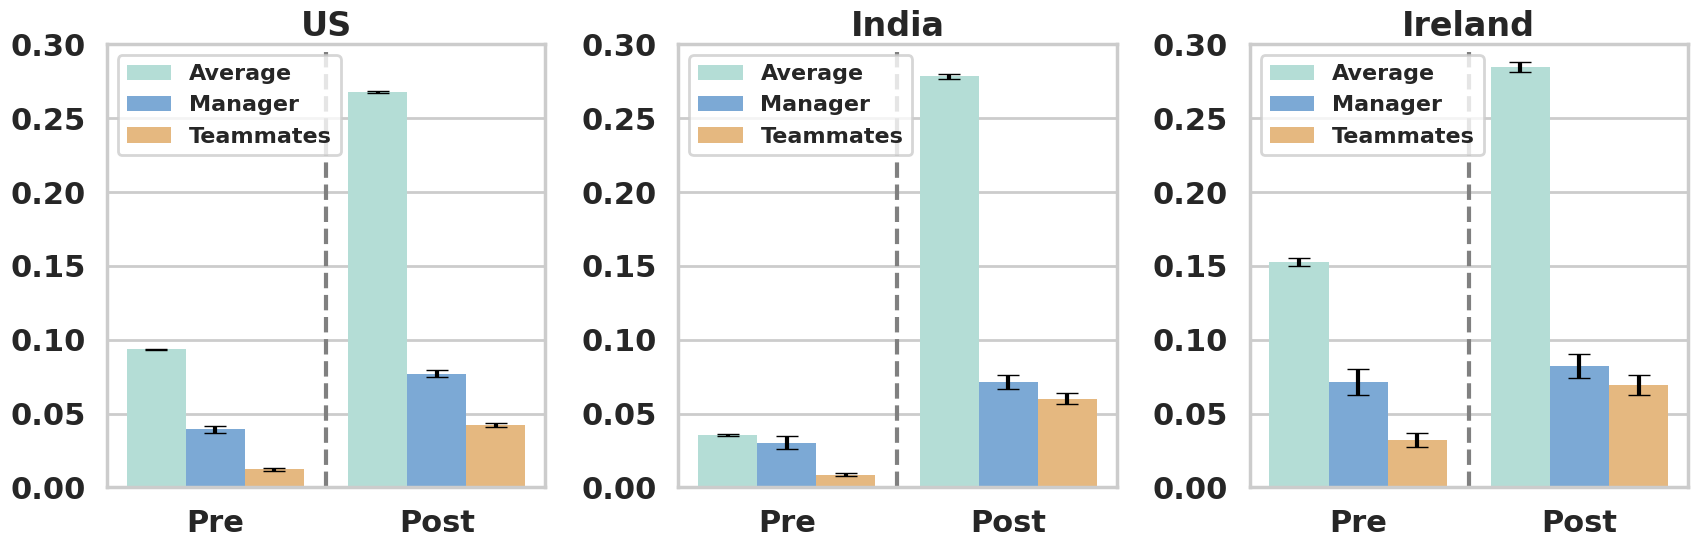

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import seaborn as sns
sns.set(context='poster', style="whitegrid", font_scale=1, rc={"font.weight": "bold", "axes.labelweight": "bold"})
sns.set_context('poster')



data = """location	role	period	variable	coef	se
US	All	Post	Average	0.2677	0.000383
US	All	Post	Manager	0.0771	0.0012
US	All	Post	Teammates	0.042342	0.000733
US	All	Pre	Average	0.0935	0.000263
US	All	Pre	Manager	0.0393	0.0013
US	All	Pre	Teammates	0.012315	0.000422
India	All	Post	Average	0.2783	0.000835
India	All	Post	Manager	0.0714	0.0023
India	All	Post	Teammates	0.05997	0.001867
India	All	Pre	Average	0.0356	0.000326
India	All	Pre	Manager	0.0303	0.0022
India	All	Pre	Teammates	0.008513	0.000505
Ireland	All	Post	Average	0.2844	0.001762
Ireland	All	Post	Manager	0.0822	0.0042
Ireland	All	Post	Teammates	0.069467	0.003444
Ireland	All	Pre	Average	0.1527	0.001434
Ireland	All	Pre	Manager	0.0713	0.0046
Ireland	All	Pre	Teammates	0.031987	0.002458"""
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17.5, 6))
my_palette = sns.color_palette(["#ADE4DB", "#6DA9E4", "#F6BA6F"])#, "#9b59b6", "#f39c12", "#34495e"])

for ii, location in [(0, "US"),(1, "India"),(2, "Ireland")]:

# Function to generate plots

    # def generate_plot(location):
        # Load data
    data_io = StringIO(data)

    bife_results = pd.read_csv(data_io, sep='\t')


    # Select geography of interest
    bife_results = bife_results[bife_results.location == location]

    offset = [-.8/3, 0,
            .8/3]

    # Plot relative effect size
    post_df = bife_results
    sns.barplot(data=post_df, x='period', y='coef', hue='variable', ax=axs[ii], palette=my_palette, linewidth=0, order=['Pre', 'Post'])#, dodge=True, size=8)
    # Add the error bars manually
    for i, l in enumerate(post_df['variable'].unique()):
        for j, var in [(0, 'Pre'), (1, 'Post')]:#enumerate(post_df['period'].unique()):
            vals = post_df[(post_df['period'] == var) & (post_df['variable'] == l)]
            axs[ii].errorbar(j+offset[i], vals['coef'], yerr=vals['se']*1.96, fmt='none', c='black', capsize=8)
            print(j, l, i, var, j+offset[i])

    # Add separation line
    axs[ii].axvline(0.5, color='gray', linestyle='--')
    axs[ii].set_title(location, weight='bold')
    axs[ii].legend(fontsize=16)

    axs[ii].set_ylim((0, 0.3))
    axs[ii].set_ylabel('')
    axs[ii].set_xlabel('')

plt.tight_layout()
